# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [0]:
# Loading the basic packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [284]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [0]:
# Checking for missing values
print(attrition_data.isna().sum())
# Printing the types of data in the dataset 
print(attrition_data.info())
attrition_data.Attrition.value_counts()

In [0]:
label_1 = attrition_data['BusinessTravel'].astype('category').cat.categories.tolist()
replace_map_comp_1 = {'BusinessTravel' : {k: v for k,v in zip(label_1,list(range(1,len(label_1)+1)))}}

label_2 = attrition_data['EducationField'].astype('category').cat.categories.tolist()
replace_map_comp_2 = {'EducationField' : {k: v for k,v in zip(label_2,list(range(1,len(label_2)+1)))}}

label_3 = attrition_data['Gender'].astype('category').cat.categories.tolist()
replace_map_comp_3 = {'Gender' : {k: v for k,v in zip(label_3,list(range(1,len(label_3)+1)))}}

label_4 = attrition_data['JobRole'].astype('category').cat.categories.tolist()
replace_map_comp_4 = {'JobRole' : {k: v for k,v in zip(label_4,list(range(1,len(label_4)+1)))}}

label_5 = attrition_data['MaritalStatus'].astype('category').cat.categories.tolist()
replace_map_comp_5 = {'MaritalStatus' : {k: v for k,v in zip(label_5,list(range(1,len(label_5)+1)))}}

label_6 = attrition_data['OverTime'].astype('category').cat.categories.tolist()
replace_map_comp_6 = {'OverTime' : {k: v for k,v in zip(label_6,list(range(1,len(label_6)+1)))}}

label_7 = attrition_data['Department'].astype('category').cat.categories.tolist()
replace_map_comp_7 = {'Department' : {k: v for k,v in zip(label_7,list(range(1,len(label_7)+1)))}}

print(replace_map_comp_1)

attrition_data_lc = attrition_data.copy()
attrition_data_lc['BusinessTravel'] = attrition_data_lc['BusinessTravel'].astype('category')
attrition_data_lc['EducationField'] = attrition_data_lc['EducationField'].astype('category') 
attrition_data_lc['Gender'] = attrition_data_lc['Gender'].astype('category')
attrition_data_lc['JobRole'] = attrition_data_lc['JobRole'].astype('category')
attrition_data_lc['MaritalStatus'] = attrition_data_lc['MaritalStatus'].astype('category') 
attrition_data_lc['OverTime'] = attrition_data_lc['OverTime'].astype('category')
attrition_data_lc['Department'] = attrition_data_lc['Department'].astype('category')



# Creating a mapping for x and o in the tic tac data 

attrition_data_lc['BusinessTravel'] = attrition_data_lc['BusinessTravel'].cat.codes 
attrition_data_lc['EducationField'] = attrition_data_lc['EducationField'].cat.codes 
attrition_data_lc['Gender'] = attrition_data_lc['Gender'].cat.codes 
attrition_data_lc['JobRole'] = attrition_data_lc['JobRole'].cat.codes
attrition_data_lc['MaritalStatus'] = attrition_data_lc['MaritalStatus'].cat.codes 
attrition_data_lc['OverTime'] = attrition_data_lc['OverTime'].cat.codes 
attrition_data_lc['Department'] = attrition_data_lc['Department'].cat.codes  


print(attrition_data_lc.info())
attrition_data_lc.columns

In [287]:
attrition_data_lc.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60e6dc3fd0>,
      dtype=object)

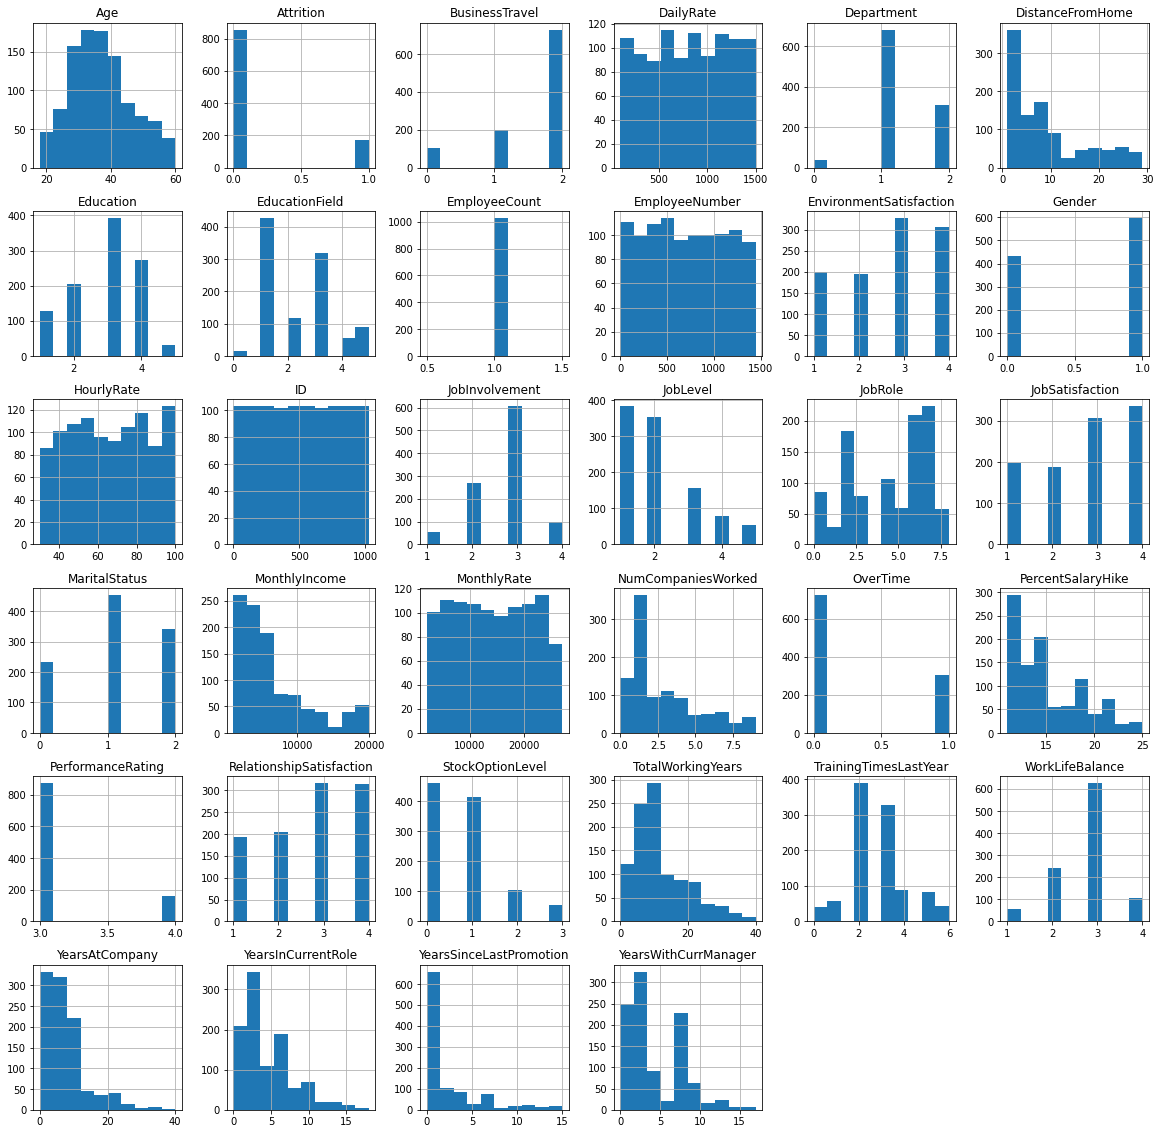

In [288]:
# Visualizing the effect of feature normalization
attrition_data_lc.hist(figsize=(20,20))

In [0]:
from sklearn import preprocessing 

# Normalizing Data
x = attrition_data_lc.iloc[:].values 
x 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler) 

In [0]:
Standardisation = preprocessing.StandardScaler() 
x_after_Standardisation = Standardisation.fit_transform(x) 
print ("\nAfter Standardisation : \n", x_after_Standardisation) 
attrition_data_final=pd.DataFrame(data=x_after_Standardisation, columns=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ID'])

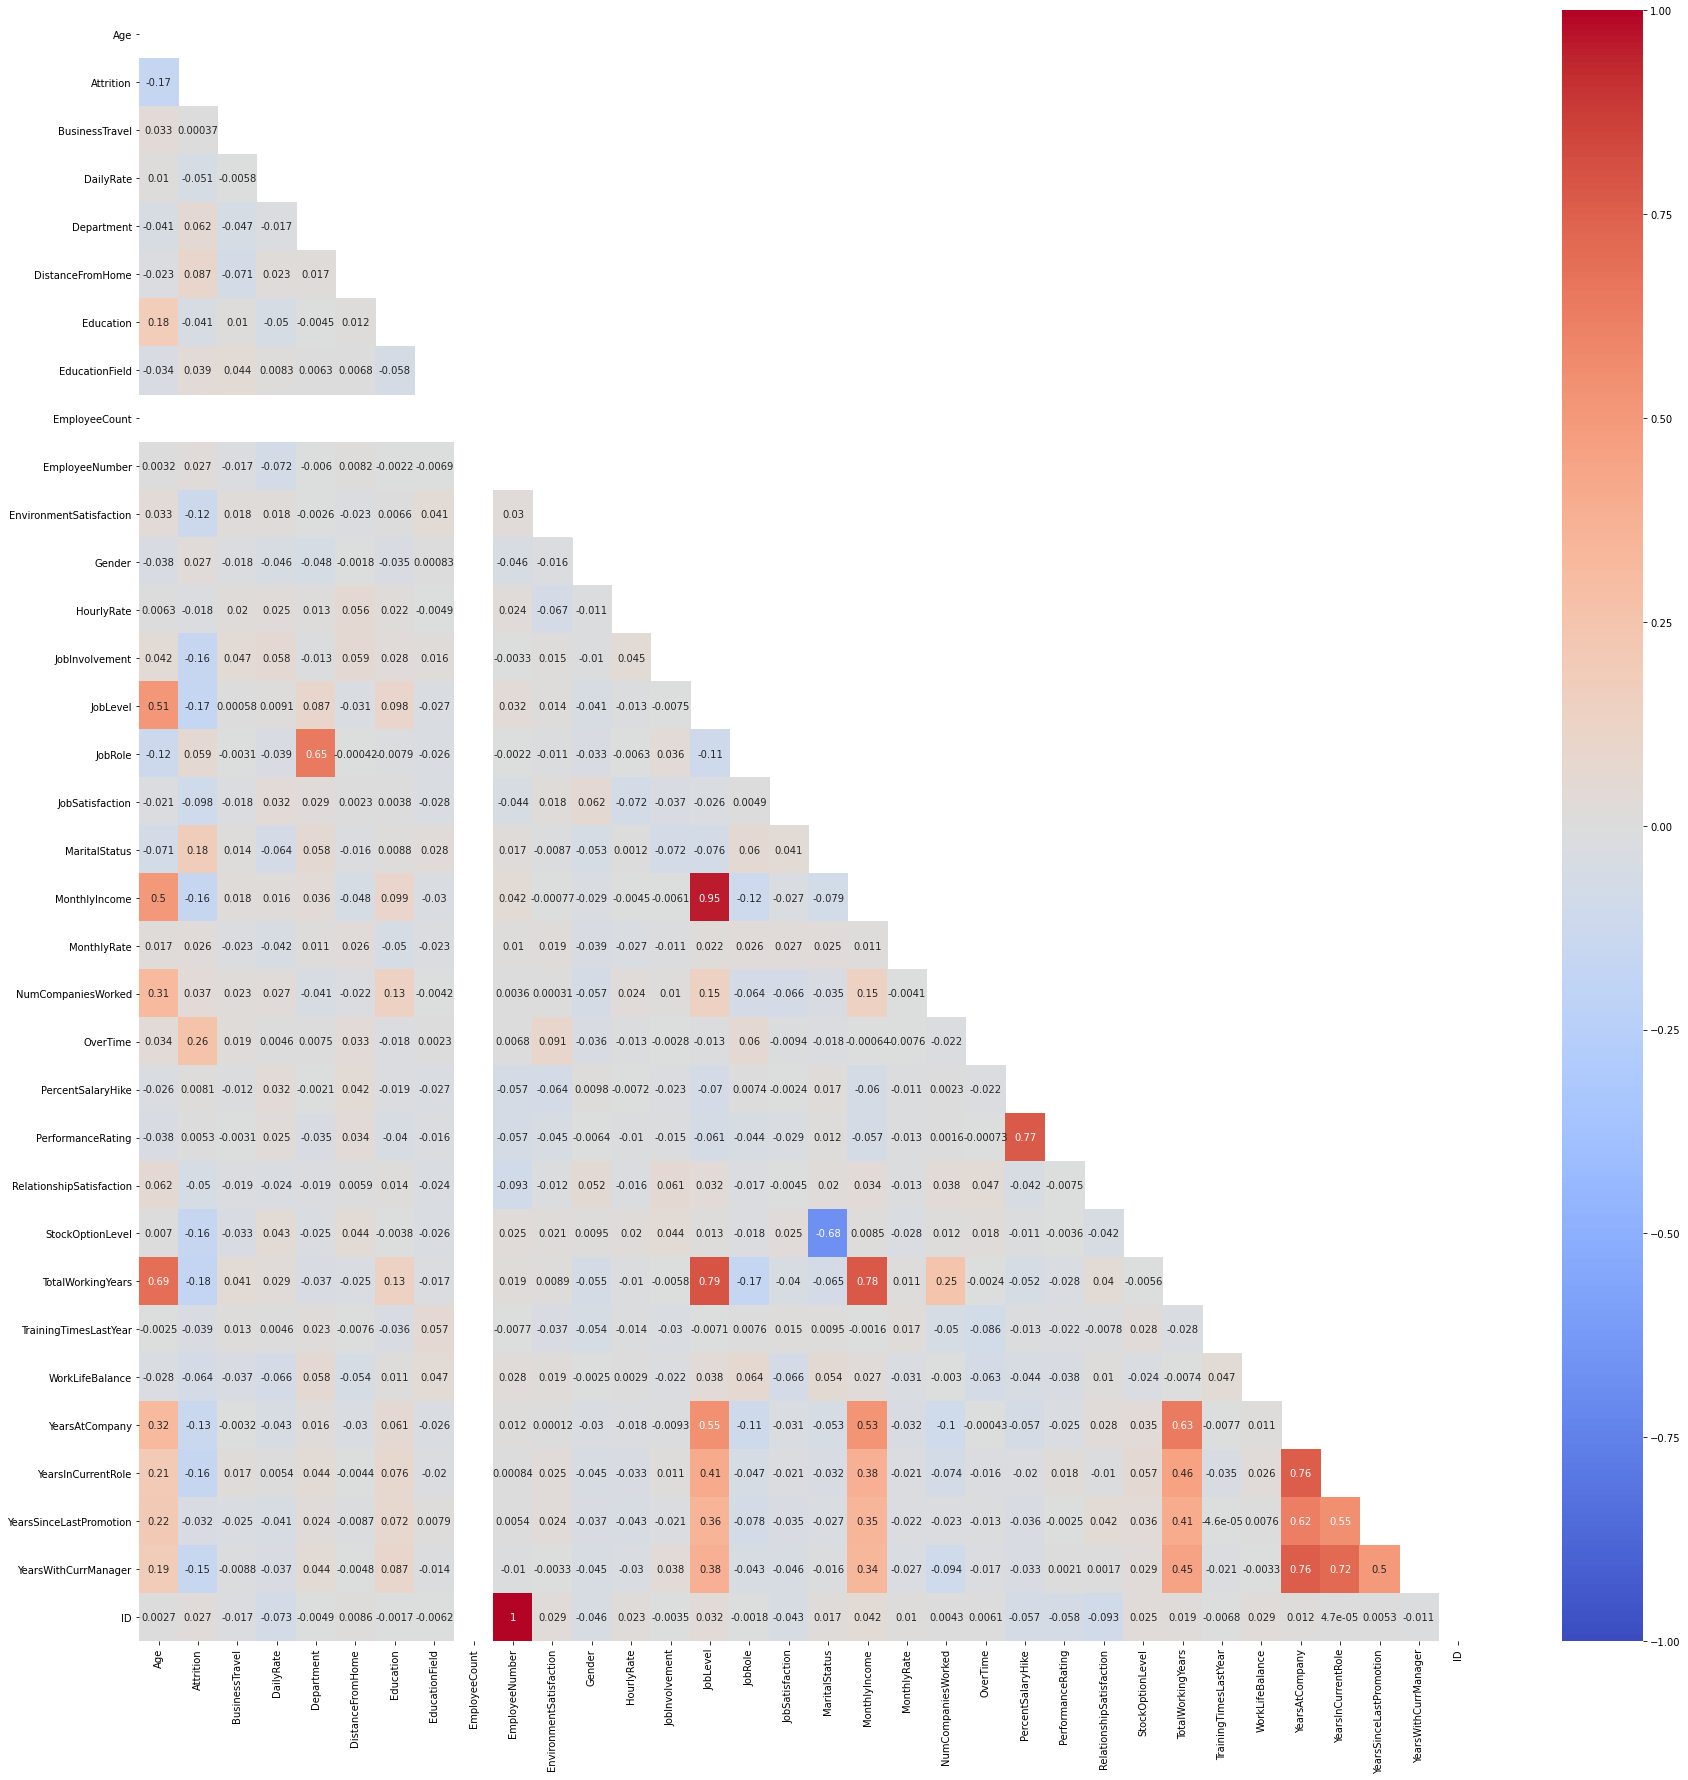

In [291]:
# Visualizing the correlation matrix 
plt.figure(figsize=(30,30))
mask = np.zeros_like(attrition_data_final.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data_final.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

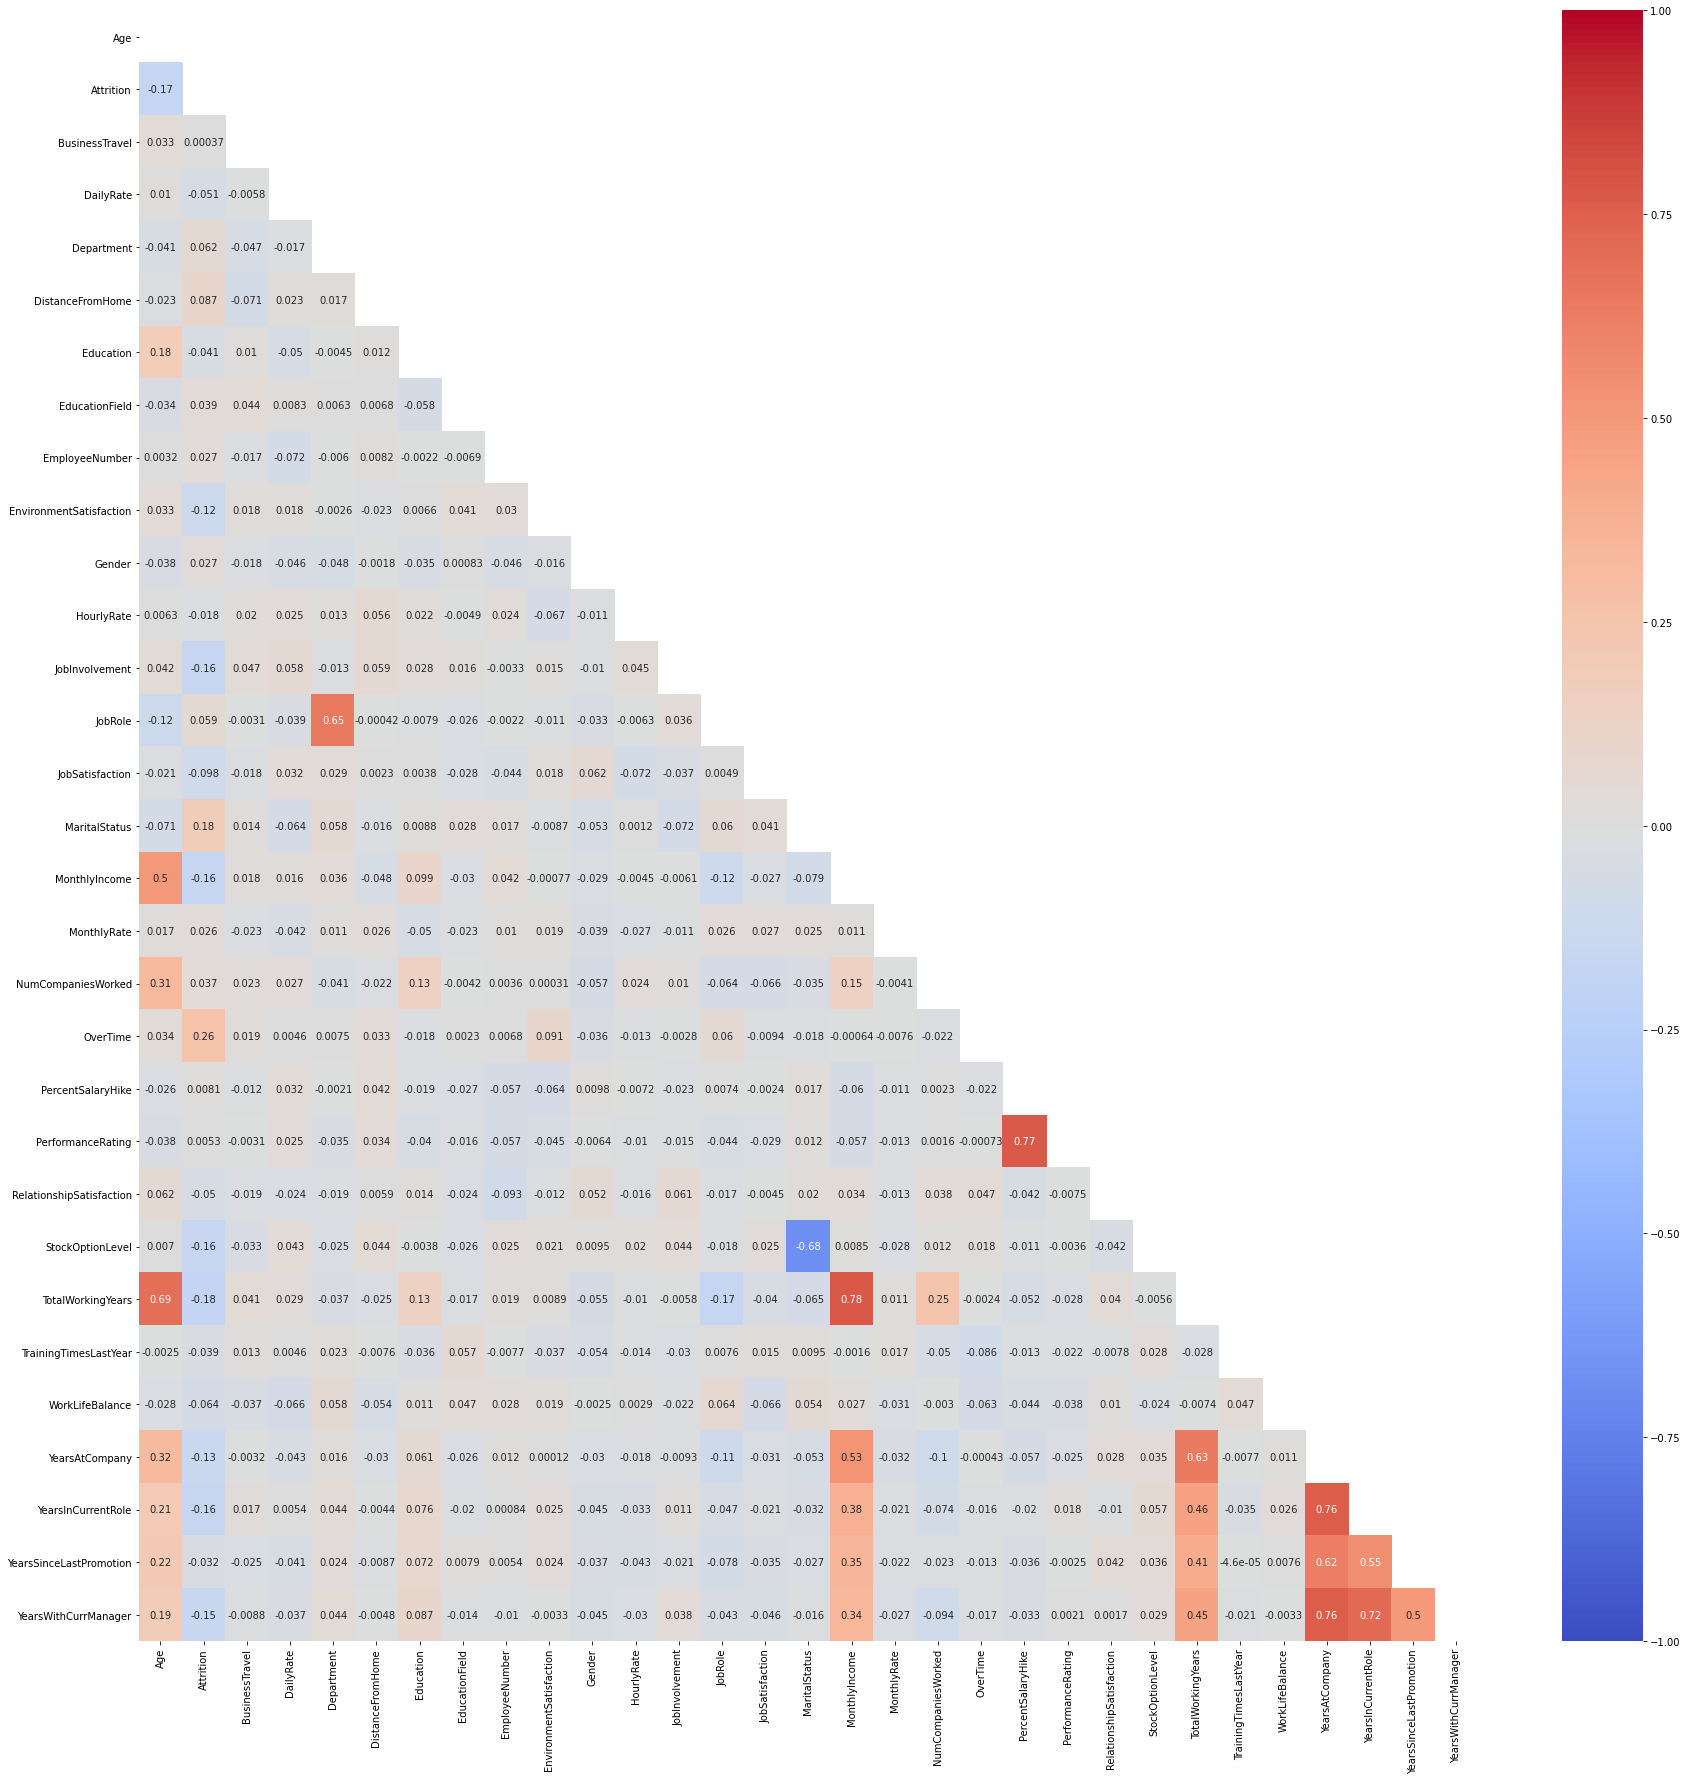

In [292]:
# Extracting the features and label
X = attrition_data_final.drop(['EmployeeCount', 'ID', 'JobLevel'], axis = 1)
# Visualizing the correlation matrix 
plt.figure(figsize=(30,30))
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()
X_1 = attrition_data_final.drop(['Attrition'], axis = 1)
y = attrition_data_final['Attrition']

In [293]:
# Splitting the data into train and test 
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.2, random_state=123)

# Instantiating the classifier 
rfr = RandomForestRegressor(n_estimators=30,
                            random_state=1111,
                            max_features=4)

# Fitting the instantiator 
rfr.fit(X_1_train, y_train)

# Printing the training and testing accuracies 
print('The training error is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(X_1_train))))
print('The testing error is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(X_1_test))))

The training error is 0.24
The testing error is 0.65


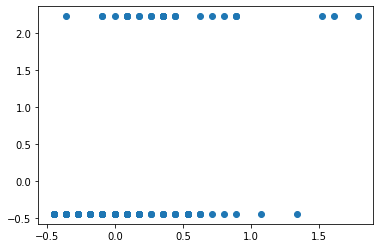

In [294]:
plt.plot(rfr.predict(X_1_test),y_test, 'o')
#plt.plot(rfr.predict())

In [295]:
### RandomForestClassifier ###

X_rfc=attrition_data_lc.drop(['Attrition','EmployeeCount', 'ID', 'JobLevel'], axis = 1)
y_rfc=attrition_data_lc['Attrition']

# split data into X and y
Xrfc_train, Xrfc_test, yrfc_train, yrfc_test = train_test_split(X_rfc, y_rfc, train_size=0.8, random_state=123)
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1,3,5,7,10,20,25,30,60,80]:
      rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
      model.rfc=rfc.fit(Xrfc_train, yrfc_train) # print(rfc)
      train_predictions = rfc.predict(Xrfc_train)
      test_predictions = rfc.predict(Xrfc_test)
      train_scores.append(round(accuracy_score(yrfc_train, train_predictions), 2))
      test_scores.append(round(accuracy_score(yrfc_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))
# plot the loss as well 

The training scores were: [0.91, 0.96, 0.97, 0.98, 0.98, 0.99, 1.0, 1.0, 1.0, 1.0]
The testing scores were: [0.76, 0.79, 0.8, 0.83, 0.85, 0.83, 0.84, 0.86, 0.86, 0.86]


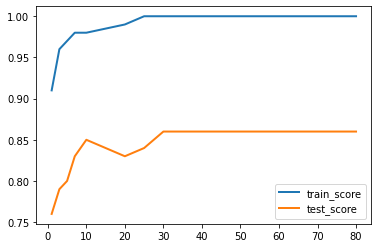

In [296]:
z = [1,3,5,7,10,20,25,30,60,80]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [297]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(yrfc_test, test_predictions))
print(classification_report(yrfc_test, test_predictions))
pd.DataFrame(
    confusion_matrix(yrfc_test, test_predictions),
    columns=['Predicted Attribution = 0', 'Predicted Attribution = 1'],
    index=['True Attribution = 0', 'True Attribution = 1']
)

Accuracy: 0.8592233009708737
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       172
           1       0.86      0.18      0.29        34

    accuracy                           0.86       206
   macro avg       0.86      0.59      0.61       206
weighted avg       0.86      0.86      0.82       206



,Predicted Attribution = 0,Predicted Attribution = 1
True Attribution = 0,171,1
True Attribution = 1,28,6


In [298]:
### Extreme Gradient Boosting with XGBoost ###

# Instantiating the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(Xrfc_train, yrfc_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [299]:
# Applying classifier on train (seen) set
predictions_1 = xgb_clf.predict(Xrfc_train)
# accuracy score
accuracy_train = accuracy_score(yrfc_train, predictions_1)
print(np.round(accuracy_train*100, 2), '%')

87.23 %


In [300]:
# Applying classifier on test (unseen) set
predictions_2 = xgb_clf.predict(Xrfc_test)
# accuracy score
accuracy_test = accuracy_score(yrfc_test, predictions_2)
print('model accuracy: ',np.round(accuracy_test*100, 2), '%')
print(classification_report(yrfc_test, predictions_2))
pd.DataFrame(
    confusion_matrix(yrfc_test, predictions_2),
    columns=['Predicted Attribution = 0', 'Predicted Attribution = 1'],
    index=['True Attribution = 0', 'True Attribution = 1']
)

model accuracy:  83.5 %
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       172
           1       0.50      0.24      0.32        34

    accuracy                           0.83       206
   macro avg       0.68      0.59      0.61       206
weighted avg       0.80      0.83      0.81       206



,Predicted Attribution = 0,Predicted Attribution = 1
True Attribution = 0,164,8
True Attribution = 1,26,8


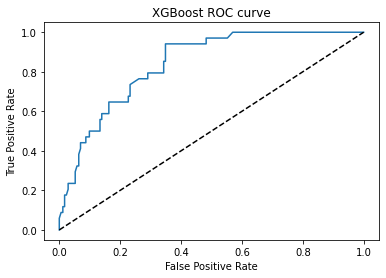

In [301]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(Xrfc_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(yrfc_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

In [0]:
### DecisionTreeClassifier ###

from sklearn.model_selection import train_test_split

Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(X_rfc, y_rfc, train_size=0.8, random_state=1)
from sklearn import tree

model = tree.DecisionTreeClassifier()
clf=model.fit(Xdt_train, ydt_train)

In [303]:
ydt_predict = model.predict(Xdt_test)

from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score(ydt_test, ydt_predict))
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(ydt_test, ydt_predict),
    columns=['Predicted Attribution = 0', 'Predicted Attribution = 1'],
    index=['True Attribution = 0', 'True Attribution = 1']
)

Accuracy: 0.8252427184466019


,Predicted Attribution = 0,Predicted Attribution = 1
True Attribution = 0,159,21
True Attribution = 1,15,11


In [0]:
!pip install graphviz
!pip install pydotplus

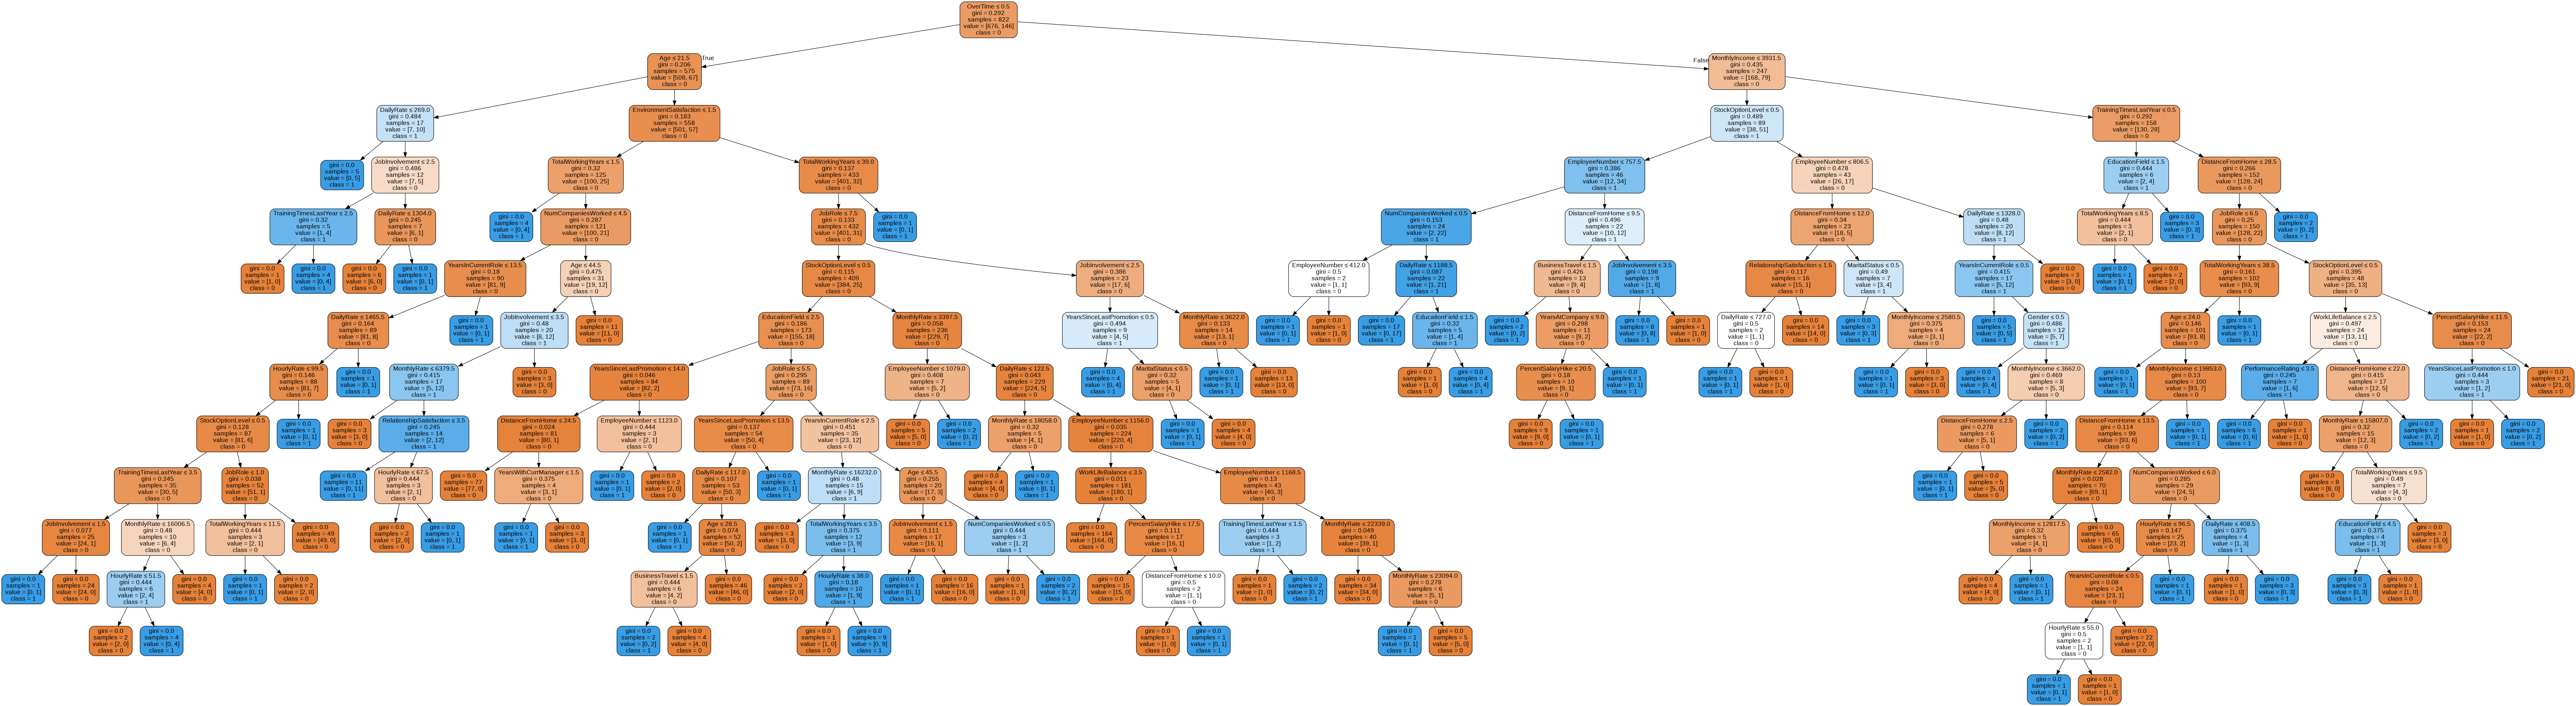

In [304]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X_rfc.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [305]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(X_rfc, y_rfc, test_size=0.2) # 80% training and 20% test

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(Xknn_train, yknn_train)

#Predict the response for test dataset
yknn_pred = knn.predict(Xknn_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(yknn_test, yknn_pred))
pd.DataFrame(
    confusion_matrix(yknn_test, yknn_pred),
    columns=['Predicted Attribution = 0', 'Predicted Attribution = 1'],
    index=['True Attribution = 0', 'True Attribution = 1']
)

Accuracy: 0.8398058252427184


,Predicted Attribution = 0,Predicted Attribution = 1
True Attribution = 0,173,1
True Attribution = 1,32,0


____________________________________________________________________________________________________
**Final Conclusion:**
____________________________________________________________________________________________________

In [306]:
print("Accuracy from randomforestclassifier:",np.round(metrics.accuracy_score(yrfc_test, test_predictions)*100, 2), '%'); 
print('Accuracy from XGBClassifier :', np.round(accuracy_score(yrfc_test, predictions_2)*100, 2), '%')
print('Accuracy from DecisionTreeClassifier :', np.round(accuracy_score(ydt_test, ydt_predict)*100, 2), '%')
print("Accuracy from KNN Classifier:", np.round(metrics.accuracy_score(yknn_test, yknn_pred)*100, 2), '%')

Accuracy from randomforestclassifier: 85.92 %
Accuracy from XGBClassifier : 83.5 %
Accuracy from DecisionTreeClassifier : 82.52 %
Accuracy from KNN Classifier: 83.98 %
